# Project Overview

This project aims to build a machine learning model that predicts whether a loan application will be approved or not. This is a common problem in the **fintech and banking sectors**, where accurate credit risk assessment is crucial.

We'll use historical loan applicant data, which includes information such as:

- Gender, Marital Status, Dependents
- Applicant and Co-applicant Income
- Credit History
- Loan Amount & Term
- Property Area

By applying **supervised learning algorithms**, we will build a predictive model to classify whether a loan should be **approved (`Y`) or not (`N`)**.



### Objectives

- Perform **Exploratory Data Analysis (EDA)** on loan application data.
- Preprocess the data: handle missing values, encode categorical features.
- Build and evaluate machine learning models.
- Identify important factors influencing loan approvals.

Let’s start this task by importing the necessary Python libraries

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('loan_prediction.csv')
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [31]:
#I’ll drop the loan id column and move further:
df = df.drop('Loan_ID', axis=1)
#Now let’s have a look if the data has missing values or not:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The data has missing values in some of the categorical columns and some numerical columns. Let’s have a look at the descriptive statistics of the dataset before filling in the missing values:

In [32]:
print(df.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


Now let’s fill in the missing values. In categorical columns, we can fill in missing values with the mode of each column. The mode represents the value that appears most often in the column and is an appropriate choice when dealing with categorical data

In [35]:
# Fill missing values in categorical columns with mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

To fill in the missing values of numerical columns, we have to choose appropriate measures:

We can fill in the missing values of the loan amount column with the median value. The median is an appropriate measure to fill in missing values when dealing with skewed distributions or when outliers are present in the data;

We can fill in the missing values of the loan amount term column with the mode value of the column. Since the term of the loan amount is a discrete value, the mode is an appropriate metric to use;

We can fill in the missing values of the credit history column with the mode value. Since credit history is a binary variable (0 or 1), the mode represents the most common value and is an appropriate choice for filling in missing values

In [5]:
# Fill missing values in LoanAmount with the median
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

## Exploratory Data Analysis

Now let’s have a look at the distribution of the loan status column

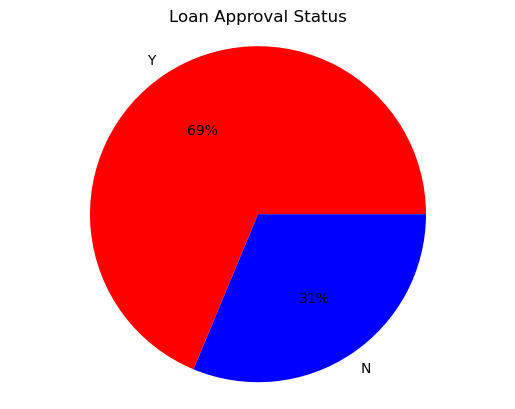

In [36]:
import matplotlib.pyplot as plt

loan_status_count = df['Loan_Status'].value_counts()
plt.pie(loan_status_count, labels=loan_status_count.index, autopct='%1.0f%%', colors=['red', 'blue'])
plt.title('Loan Approval Status')
plt.axis('equal')
plt.show()

# Gender Distribution

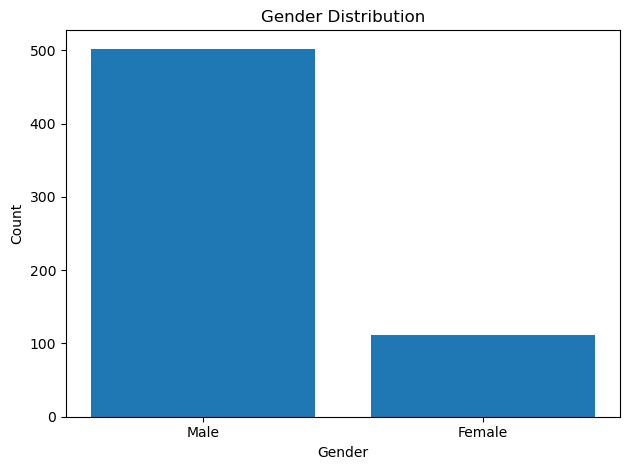

In [37]:
gender_count = df['Gender'].value_counts()
plt.bar(gender_count.index, gender_count.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Now let’s have a look at the distribution of the martial status column:

# Marital Status Distribution

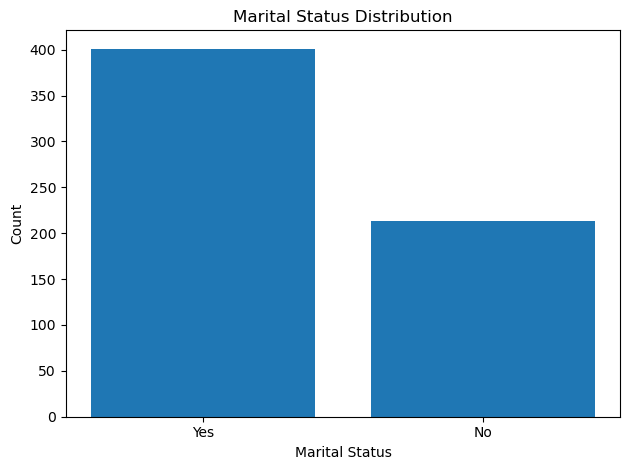

In [38]:
married_count = df['Married'].value_counts()
plt.bar(married_count.index, married_count.values)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Education Distribution 

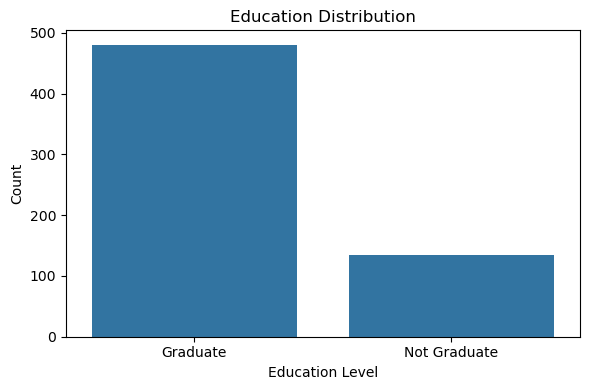

In [39]:
import seaborn as sns

education_count = df['Education'].value_counts().reset_index()
education_count.columns = ['Education Level', 'Count']

plt.figure(figsize=(6, 4))
sns.barplot(data=education_count, x='Education Level', y='Count')
plt.title('Education Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Now let’s have a look at the distribution of the self-employment column:

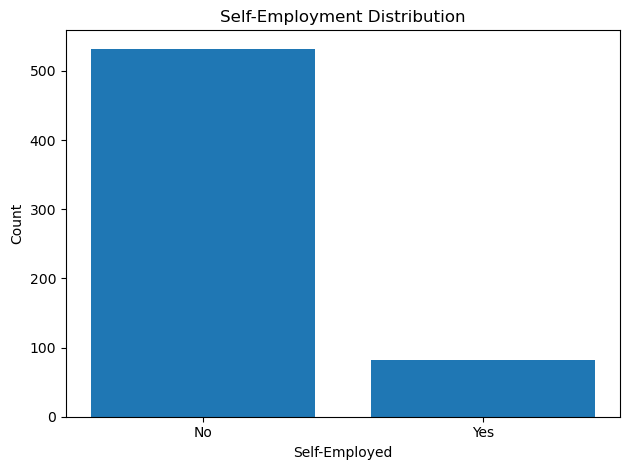

In [40]:
self_employed_count = df['Self_Employed'].value_counts()
plt.bar(self_employed_count.index, self_employed_count.values)
plt.title('Self-Employment Distribution')
plt.xlabel('Self-Employed')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Now let’s have a look at the distribution of the Applicant Income column:

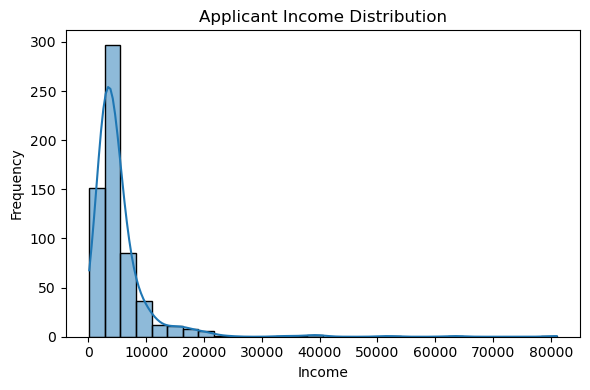

In [41]:
plt.figure(figsize=(6, 4))
sns.histplot(df['ApplicantIncome'], bins=30, kde=True)
plt.title('Applicant Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Now let’s have a look at the relationship between the income of the loan applicant and the loan status:

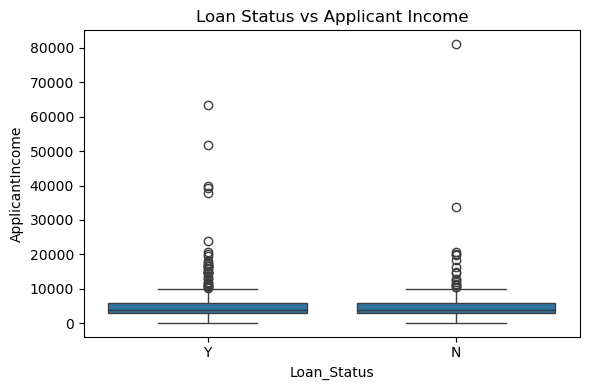

In [42]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title('Loan Status vs Applicant Income')
plt.tight_layout()
plt.show()

The “ApplicantIncome” column contains outliers which need to be removed before moving further. Here’s how to remove the outliers:

In [43]:
df = df[df['ApplicantIncome'] < df['ApplicantIncome'].quantile(0.99)]
df = df[df['CoapplicantIncome'] < df['CoapplicantIncome'].quantile(0.99)]

Now let’s have a look at the relationship between the income of the loan co-applicant and the loan status:

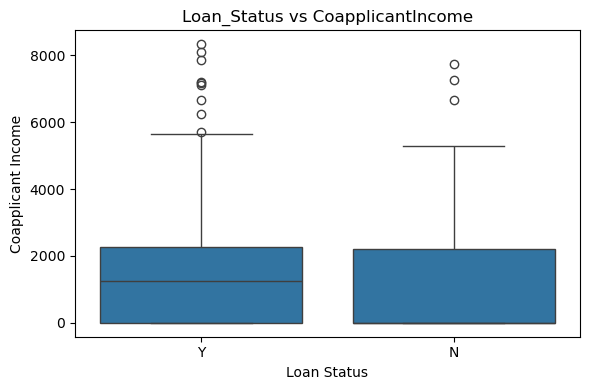

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: CoapplicantIncome vs Loan_Status
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Loan_Status', y='CoapplicantIncome')

plt.title('Loan_Status vs CoapplicantIncome')
plt.xlabel('Loan Status')
plt.ylabel('Coapplicant Income')
plt.tight_layout()
plt.show()

The income of the loan co-applicant also contains outliers. Let’s remove the outliers from this column as well:

In [45]:
# Calculate the IQR
Q1 = df['CoapplicantIncome'].quantile(0.25)
Q3 = df['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['CoapplicantIncome'] >= lower_bound) & (df['CoapplicantIncome'] <= upper_bound)]

Now let’s have a look at the relationship between the loan amount and the loan status:

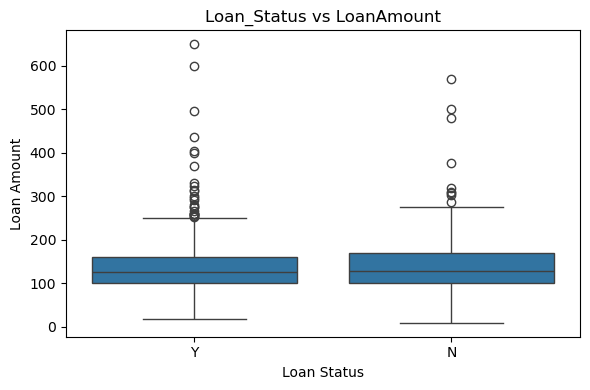

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch



plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Loan_Status', y='LoanAmount')


plt.title('Loan_Status vs LoanAmount')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.tight_layout()
plt.show()

Now let’s have a look at the relationship between credit history and loan status:

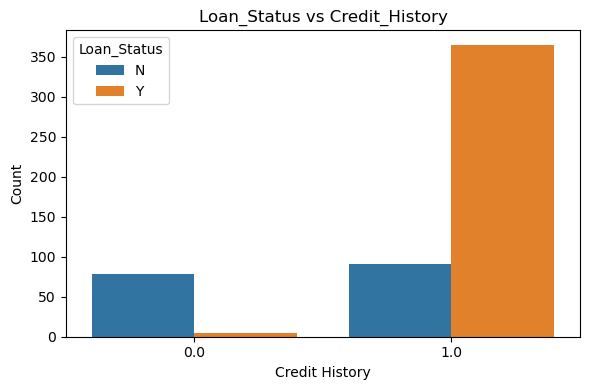

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouped bar chart: Loan_Status vs Credit_History
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Credit_History', hue='Loan_Status')

plt.title('Loan_Status vs Credit_History')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Now let’s have a look at the relationship between the property area and the loan status:

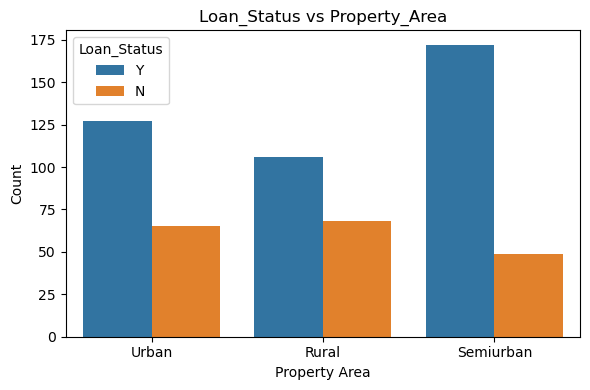

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouped bar chart: Loan_Status vs Property_Area
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Property_Area', hue='Loan_Status')

plt.title('Loan_Status vs Property_Area')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Data Preparation and Training Loan Approval Prediction Model

In this step, we will:

convert categorical columns into numerical ones;

split the data into training and test sets;

scale the numerical features;

train the loan approval prediction model.

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Identify categorical columns still present in the DataFrame
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
cat_cols = [col for col in cat_cols if col in df.columns]

# One-hot encode available categorical columns
df = pd.get_dummies(df, columns=cat_cols)

# Define features and target
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Drop rows with missing values
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]

# Scale numerical features
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Train SVM model
model = SVC(random_state=42)
model.fit(X_train, y_train)


SVC(random_state=42)

In [50]:
# Now let’s make predictions on the test set:

1
y_pred = model.predict(X_test)
2
print(y_pred)

['Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y']


Now let’s add the predicted loan approval values to the testing set as a new column in a DataFrame called X_test_df and show the predicted loan approval values alongside the original features:

In [51]:
# Convert X_test to a DataFrame
X_test_df = pd.DataFrame(X_test, columns=X_test.columns)

# Add the predicted values to X_test_df
X_test_df['Loan_Status_Predicted'] = y_pred
print(X_test_df.head())

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
545        -0.651543           0.556307    0.183360          0.255585   
298        -0.020140           0.986478    0.128906          2.255597   
537        -0.411372          -0.863037   -0.470089          0.255585   
346        -0.437963           1.487980    0.142520          0.255585   
222        -0.594117           1.168445    0.033612          0.255585   

     Credit_History  Gender_Female  Gender_Male  Married_No  Married_Yes  \
545        0.414140          False         True       False         True   
298        0.414140           True        False        True        False   
537        0.414140          False         True        True        False   
346       -2.414645          False         True       False         True   
222        0.414140          False         True        True        False   

     Dependents_0  ...  Dependents_2  Dependents_3+  Education_Graduate  \
545          True  ...       

In [52]:
from sklearn.metrics import accuracy_score, precision_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label='Y'))



Accuracy: 0.8431372549019608
Precision: 0.8255813953488372


SVM Performance:
Accuracy  : 0.84
Precision : 0.83
Recall    : 0.99
F1-score  : 0.90
Confusion Matrix:
[[15 15]
 [ 1 71]]


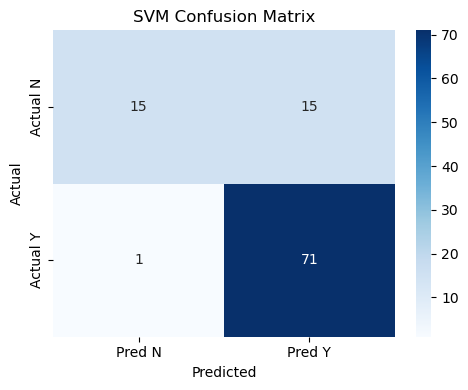

In [53]:
from sklearn.metrics import recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Additional metrics
recall = recall_score(y_test, y_pred, pos_label='Y')
f1 = f1_score(y_test, y_pred, pos_label='Y')
cm = confusion_matrix(y_test, y_pred)

# Print all metrics
print("SVM Performance:")
print(f"Accuracy  : {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision : {precision_score(y_test, y_pred, pos_label='Y'):.2f}")
print(f"Recall    : {recall:.2f}")
print(f"F1-score  : {f1:.2f}")
print("Confusion Matrix:")
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred N', 'Pred Y'],
            yticklabels=['Actual N', 'Actual Y'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()